# An Introduction to Machine Learning
### with a Python Machine Learning Context

# Part 1: ML

##### Review: Probability

Recall, the meaning of $P(Q|A)$, is how *confident* we are in a particular answer to a $Q$usestion given particular $A$ssumptions...

$$P(Question?|Assumptions)$$

All probability is conditional, ie., contains assumptions -- but when writing $P(Q)$ we mean "assuming the relevant background information" -- ie., we are implicit about the assumptions.

## What is Machine Learning?

* Computational Statitical Inference
* Answering/Estimating Probabilities with Alg + (Historical) Data

* Historical Dataset
    * $(X, y)$
    * $X$ observable **features**
    * $y$ (future) unobservable prediction **target**
    
    
* Goal estimate these:
    * $P(C | B)$
        * how confident are we in some claim/question about $C$
            * given some assumed claim $B$
    * $P(Y | X)$
        * How probable is it someone is violent ($y$) given we know their characteristics $X$?
    * $P(X)$
        * What's the most common location (in our dataset)?
        * How often are people in care (in our dataset)?

In machine learning the key "assumption", A, is an associative statitical model, $\hat{f}$.

Eg., What's the probability that someone is violent ($y$) given known characteristics $X$ and a scoring model $f$ (we drive from averages in the historical data). 

$P(Y|X, \hat{f}) = \hat{f}(X) >= 100 = w_0X_0 + w_1X_2 + \dots >= 100$

Aside: `^` means "estimate", `f` some function ("a relationship"). 

Recall, using the crimes example, 

In [12]:
weights = {'crimes' : 3, 'age': 5 } # basically "the model"

In [13]:
newX = (4, 30) # claims about the suspect

The probability calculation, 

In [14]:
Py = (weights['crimes'] * newX[0] + weights['age'] * newX[1]) >= 100

In [15]:
Py

True

## What types of Machine Learning are there?

Three major problem categories in Machine Learning are regression, classification and clustering.

* Supervised
    * "You have the answers" 
        * Both $(X, y)$
            * $y$ are the *historical* answers to the question you're asking
        * Almost always asking: $P(Y|X)$
    * <font color=red>Regression</font>
        * $y$ is quantity
        * Eg., 
            * $y \in [0, 100]$
            * predicting eg., age from a height 
    * <font color=red>Classification</font>
        * $y$ is a category (, label)
        * Eg., binary classification 
            * $y \in \{True, False\}$
            * Predict Violent|NonViolent 
* Unsupervised
    * <font color=red>Clustering</font>
        * There is no $y$, we are not predicting
        * We are analysing patterns/groupings in $X$ only 
            

#### Example: Films & Ages

In [19]:
X = [
    (18, 7), # age, film rating
    (19, 8),
    (21, 9),
]

#### Regression

Predict $y$ which is a quantity,

In [20]:
y = [14, 12, 18] # amount spent on sweets

#### Classification

Predict $y$ which is a cateogry,

In [21]:
y = ["Transformers", "Transfomers", "James Bond"]

* **Clustering** (Unsupervised)

In [23]:
y = None

## How are machine learning problems solved?

* We have $(X, y)$
* We need $\hat{y} = \hat{f}(X)$
    * $\hat{f}$ is missing!
    
    
The purpose of a machine learning algorithm is to consider the dataset $(X, y)$ and produce a model $\hat{f}$ which enables you to compute $y$ from $X$. 

* Examples of Algorithms
    * Simple Linear Regression Algorithm
    * $k$ Neartest Neighbors
    * Neural Networks
    * others...
    
* Note: they all have the same job!
    * $ (X, y) \rightarrow \mathcal{Alg} \rightarrow \hat{f} $

### Example: Simple Linear Regression

Predict: graduate salary from university ranking.

In [25]:
X_points = [98, 67, 34, 59, 23]
y_salary = [45, 30, 17, 29, 15]

<AxesSubplot:>

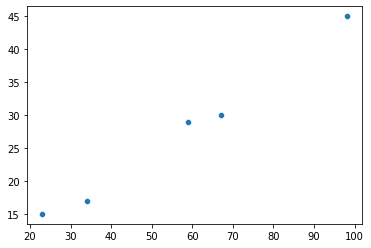

In [30]:
%matplotlib inline
import seaborn as sns


sns.scatterplot(x=X_points, y=y_salary)

We start guessing a line at random, by randomly generating a `slope` and `intercept`, 

In [42]:
from random import randint

slope = randint(-3, 3)
intercept = randint(-3, 3)

**Q. Show the `slope` and the `intercept`.**

**Q. Define two new ones `slope_small` and `intercept_small` which are the originals divided by 10.**

To compute the predictions using these *parameters* (ie., `slope`, `intercept`), we loop over the original dataset `X` and compute predictions for `y`. 

In [43]:
predictions = []
for x in X_points:
    predictions.append(slope * x + intercept)

**Q. Write a loop to compute `predictions_small`, ie., a list of predictons using your `slope_small` and `intercept_small`.**

We draw both the original $(X, y)$ and our predictions for $y$ ($\hat{y}$).

<AxesSubplot:>

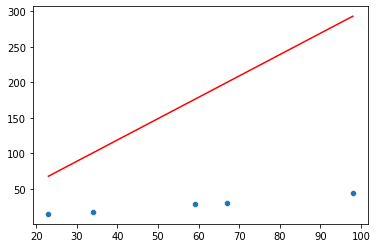

In [45]:
sns.scatterplot(x=X_points, y=y_salary)
sns.lineplot(x=X_points, y=predictions, color="red")

**Q. The code `sns.lineplot(x=xs, y=ys)` adds a line to a graph using `xs` as the $x$ values and `y` as the $y$ values. Add a line of your `predictions_small`.**

##### Trying lots

Rather than try one pair of parameters, we can try, eg., `3 * 3`, 

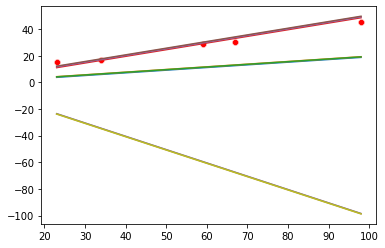

In [77]:
from random import randint


# we dont use `slope_attempt`, its just a counter of our attempts
for slope_attempt in range(0, 3):
    slope = randint(-10, 10)/10 # -1.0, -0.9, .. to 1    

    for intercept_attempt in range(0, 3):
        intercept = randint(-10, 10)/10 

        predictions = []
        for x in X_points:
            predictions.append(slope * x + intercept)

        sns.scatterplot(x=X_points, y=y_salary, color="red")
        sns.lineplot(x=X_points, y=predictions)

**Q. Run the code above a few times until a line happens to "look good".**

**Q. Show the `predictions` and the original `y`.**

**Q. By importing `mean`, `stdev` from statitics show the mean/stdev of the `predictions` and the `y`. Are they close?**

#### Choosing the best line

We try $100$ slopes, and for each slope, $100$ intercepts *at random* in the interval $[-1.0, 1.0]$.

For each attempt we loop through each historical $X$ and compute a prediction $\hat{y}$ using the guessed `slope` and `intercept`. In order to choose the best parameters we also track the errors.

The errors are computed by comparing the prediction $\hat{y}$ with the historical observation $y$ (from the historical dataset `y_salary`). 

To compute the error we use `abs()` which ignores the sign, ie., whether the predictions are above/below the historical data. Without this, the "best line" is always the most negative. 

Having computed the predictions using `slope` and `intercept`, *and* having computed the error using $y$, we remember the *total error* and which parameters gave that error. 

In [57]:
from random import randint


attempts = []
for slope_attempt in range(0, 100):
    slope = randint(-10, 10)/10    

    for intercept_attempt in range(0, 100):
        intercept = randint(-10, 10)/10 

        predictions = []
        errors = []
        for x, y in zip(X_points, y_salary):
            yhat = slope * x + intercept  # NOTE: only using x
            
            errors.append( abs(y - yhat) ) #NOTE: use historical y to judge error
            predictions.append(yhat)
            
        attempts.append(
            (sum(errors), (slope, intercept))
        )

The `min()` function provides the element in a dataset which has the minimum first entry in the element. Here the first entry is the error, and the second entry is the parameters.

So `min(attempts)` gives us the best parameters,

In [58]:
min(attempts)


(11.0, (0.5, -0.5))

In [64]:
info = min(attempts)

best_slope = info[1][0]
best_intercept = info[1][1]

**Q. Show the `best_slope` and `best_intercept`.**

**Q. Using a loop, compute predictions for `X_points` using `best_slope` and `best_intercept` (see your code from earlier).**

**EXTRA: Q. Modify your loop to loop over `zip(X_points, y_salary)`, and hence get an `x` and `y`. Keep track of the `best_errors` for each point (`best_errors.append( abs(y - yhat) )`) in a seperate list. Report the `mean` and `stdev` of the errors.**

---

Aside: this can be written more easily,

In [67]:
(error, (best_slope, best_intercept)) = min(attempts) # (11.0, (0.5, -0.5))

(In python you can assign multiple variables at once by matching up the pattern on LHS with the RHS). 

In [68]:
best_slope

0.5

---

Knowing the `best_slope` and the `best_intercept` we can now visualize our solution. We recompute the predictions and show alongside the original $(X, y)$.

In [71]:
predictions = []
for x in X_points:
    yhat = best_slope * x + best_intercept
    
    
    predictions.append(yhat)

<AxesSubplot:>

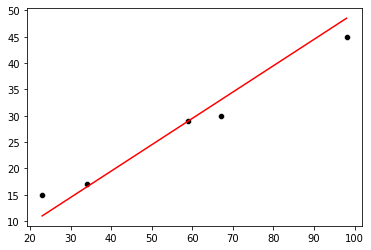

In [72]:
sns.scatterplot(x=X_points, y=y_salary, color="black")
sns.lineplot(x=X_points, y=predictions, color="red")

#### Computing a Prediction

Suppose a new university comes along with a ranking of `67.5` points. What will the average salary of a graduate be?

In [76]:
X_new_university = 67.5

yhat_unknown_salary = (best_slope * X_new_university) + best_intercept

The prediction is $£33, 250$ per year,

In [75]:
yhat_unknown_salary

33.25

**Q. The formula for the model is $\hat{f}(x; \beta_{slope}, \beta_{intercept})  = \beta_{slope}x + \beta_{intercept}$. Describe how the algorithm above produced the $\beta$ values.**

### Aside: Improving the Algorithm

```python
attempts = []
slope = randint(-10, 10)/10    # start at random
for slope_attempt in range(0, 100):    
    # sketching a better method: move slope based on how far away
    slope -= 0.1 * sum(errors)
    intercept = randint(-10, 10)/10  # start at random
    
    for intercept_attempt in range(0, 100):
        # sketching a better method: move intercept based on errors
        intercept -= 0.1 * sum(errors)
            ...
        
```

## What is Supervised Learning?

Supervised learning is predicting a $y$ given an $X$. 

The approach is to find a model $\hat{f}$, derived from a historical dataset, which can compute $\hat{y}$ from some $X$ where the $y$ is unknown. 

**Q. Look at the formula for $\hat{f}$ above from linear regression. What parts, in the formula, did the algorithm produce?**

### Reflection 

* Dataset
    * $(X, y)$
        * $X$ university ranking points
        * $y$ graduate salary
    * Algorithm 
        * try lots (1000) of straight lines randomly
        * compute errors for each point in the historical dataset
        * select the line with the minimum error
    * Model = (slope, intercept)
* Solution
    * New X Point
        * newX * best_slope + best_intercept

Compare,

 $ (X, y) \rightarrow \mathcal{Alg} \rightarrow \hat{f} $
 
`(X_points, y_salary) -> for ... randint(), randint() -> (best_slope, best_intercept)`

### Example: K-Nearest Neighbors

Consider a classification example, $X$ as above, $y$ is whether you are employeed after 6 months,

In [78]:
X_points

[98, 67, 34, 59, 23]

In [81]:
y_employeed = [True, True, False, False, False]

The kNN algorithm is:

1. in the learning phase when we are produce $\hat{f}$
    * we just remember the dataset 
2. in the prediction phase we
    * look up the most similar $X$ point
    * and use *that's points* $y$ 

* The learning phase, $\hat{f}$ is just a database,

In [85]:
fhat_db = {
    "Points": X_points,
    "Employeed": y_employeed
}

**Q. Consider a move review example: $X$ is sweet-spend and $y$ is film-rating. Define a dictionary called `film_db` with two entries for the historical data; choose some intuitive values of your own**.  

* Prediction

In [86]:
X_new_uni = 79

**Q. define a `X_new_sweets` which is an amount spent on sweets for a customer before theyve watched a film**

`y_ranked` is a list of historical `y` values which are ranked by how close the new `X` was to the correponding historical `X`, 

In [115]:
y_ranked = []
for x, y in zip(fhat_db["Points"], fhat_db["Employeed"]):
    distance = abs(X_new_uni - x)
    
    
    y_ranked.append( (distance, y) )

**Q. copy/paste the above loop: (1) change `y_ranked` to `ratings_ranked`; (2) modify the `zip` so it loops over your `film_db`; (3) change `X_new_uni` to your new X for sweets.**

The prediction is the `y` for the closest `X`, here we use `min()` to find it, 

In [98]:
error, yhat_employeed = min(y_ranked)

**Q. what is your prediction `yhat_rating` for your `ratings_ranked` ?**

At the uni given by `X_new_uni` you will be employeed after 6 months,

In [100]:
yhat_employeed

True

### Improving the Algorithm

Rather than choosing the single most similar point in the database, we can choose the $k$ most similar ($k$ is up to us...), 

In [108]:
k = 3
top = sorted(y_ranked)[0:k] # sort & choose `0` to `k` entries


# loop over the first few and keep their `y`
votes = []
for error, y in top:
    votes.append(y)
  

**Q. Show `votes`. What will the `mode()` be?**

We use `mode()` to select the most popular `y`,

In [110]:
from statistics import mode  
mode(votes)

True

**Q. reporduce the loop above for your own `ratings_ranked` and show the `mode()`.**

Aside: if `False` had ben more popular, we would vote false, 

Suppose, I had chosen $k = 5$, 

In [113]:
sorted(y_ranked)[0:5]

[(12, True), (19, True), (20, False), (45, False), (56, False)]

The prediction changes to `False`, 

In [114]:
votes_k5 = []

for error, y in sorted(y_ranked)[0:5]:
    votes_k5.append(y)
    
mode(votes_k5)

False

There is no correct choice of `k`. A higher `k` leads to more "generic" predictions which are close to the whole average of all historical data. A lower `k` leads to more "highly varied" predictions which are often over-sentitive to random variations in the data.

Eg., `k=1` then you're just selecting one entry in your historical database -- you'd be predicting a future person's $y$ (eg., liking of a film) based on a *single historical persons'* view. 